Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [1]:
import pandas as pd
import numpy as np

Read files

In [2]:
# load datasets
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92334,ZWE,Africa,Zimbabwe,2021-05-26,38819.0,113.0,29.571,1589.0,2.0,0.857,2611.800,7.603,1.990,106.910,0.135,0.058,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629.0,542397.0,36.493,0.11,1725.0,0.116,0.017,58.3,tests performed,937040.0,643531.0,293509.0,9050.0,13194.0,6.30,4.33,1.97,888.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92335,ZWE,Africa,Zimbabwe,2021-05-27,38854.0,35.0,31.286,1592.0,3.0,1.000,2614.155,2.355,2.105,107.112,0.202,0.067,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953389.0,648121.0,305268.0,16349.0,12285.0,6.41,4.36,2.05,827.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92336,ZWE,Africa,Zimbabwe,2021-05-28,38918.0,64.0,36.286,1592.0,0.0,0.857,2618.461,4.306,2.441,107.112,0.000,0.058,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,976796.0,656630.0,320166.0,23407.0,12695.0,6.57,4.42,2.15,854.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92337,ZWE,Africa,Zimbabwe,2021-05-29,38933.0,15.0,36.286,15

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92339 entries, 0 to 92338
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               92339 non-null  object 
 1   continent                              87958 non-null  object 
 2   location                               92339 non-null  object 
 3   date                                   92339 non-null  object 
 4   total_cases                            89549 non-null  float64
 5   new_cases                              89548 non-null  float64
 6   new_cases_smoothed                     88536 non-null  float64
 7   total_deaths                           79642 non-null  float64
 8   new_deaths                             79800 non-null  float64
 9   new_deaths_smoothed                    88536 non-null  float64
 10  total_cases_per_million                89070 non-null  float64
 11  ne

Convert date to number

In [4]:
import datetime 

date = df.date

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_num'] = df['date'].dt.strftime('%d%m%Y')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92334,ZWE,Africa,Zimbabwe,2021-05-26,38819.0,113.0,29.571,1589.0,2.0,0.857,2611.800,7.603,1.990,106.910,0.135,0.058,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629.0,542397.0,36.493,0.11,1725.0,0.116,0.017,58.3,tests performed,937040.0,643531.0,293509.0,9050.0,13194.0,6.30,4.33,1.97,888.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,26052021
92335,ZWE,Africa,Zimbabwe,2021-05-27,38854.0,35.0,31.286,1592.0,3.0,1.000,2614.155,2.355,2.105,107.112,0.202,0.067,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953389.0,648121.0,305268.0,16349.0,12285.0,6.41,4.36,2.05,827.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,27052021
92336,ZWE,Africa,Zimbabwe,2021-05-28,38918.0,64.0,36.286,1592.0,0.0,0.857,2618.461,4.306,2.441,107.112,0.000,0.058,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,976796.0,656630.0,320166.0,23407.0,12695.0,6.57,4.42,2.15,854.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791

Percent new deaths to new cases

In [5]:
df['per_death_to_case'] = df.new_deaths / df.new_cases
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num,per_death_to_case
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,24022020,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,25022020,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,26022020,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,27022020,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,28022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92334,ZWE,Africa,Zimbabwe,2021-05-26,38819.0,113.0,29.571,1589.0,2.0,0.857,2611.800,7.603,1.990,106.910,0.135,0.058,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629.0,542397.0,36.493,0.11,1725.0,0.116,0.017,58.3,tests performed,937040.0,643531.0,293509.0,9050.0,13194.0,6.30,4.33,1.97,888.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,26052021,0.017699
92335,ZWE,Africa,Zimbabwe,2021-05-27,38854.0,35.0,31.286,1592.0,3.0,1.000,2614.155,2.355,2.105,107.112,0.202,0.067,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953389.0,648121.0,305268.0,16349.0,12285.0,6.41,4.36,2.05,827.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,27052021,0.085714
92336,ZWE,Africa,Zimbabwe,2021-05-28,38918.0,64.0,36.286,1592.0,0.0,0.857,2618.461,4.306,2.441,107.112,0.000,0.058,1.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,976796.0,656630.0,320166.0,23407.0,12695.0,6.57,4.42,2.15,854.0,NaN,14862927.0,42.729

Country

In [6]:
country = df['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


In [7]:
print(len(list_country))

230


Graphical Representation

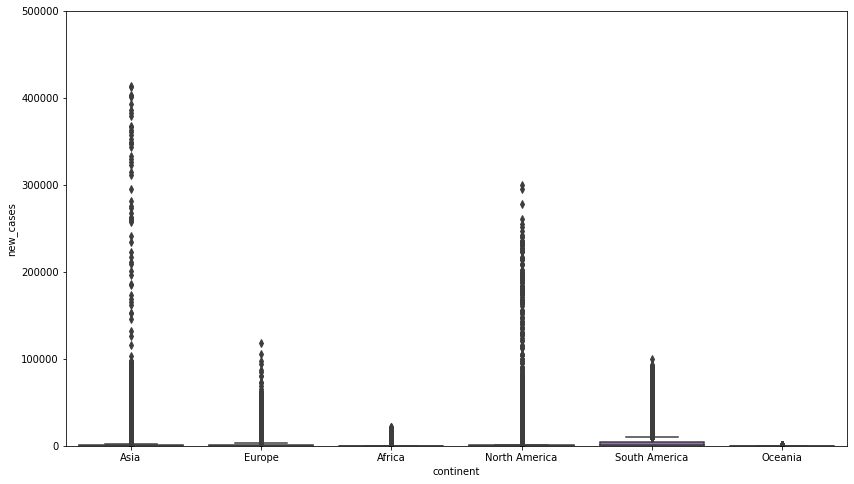

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'continent'
data = pd.concat([df['new_cases'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=500000);

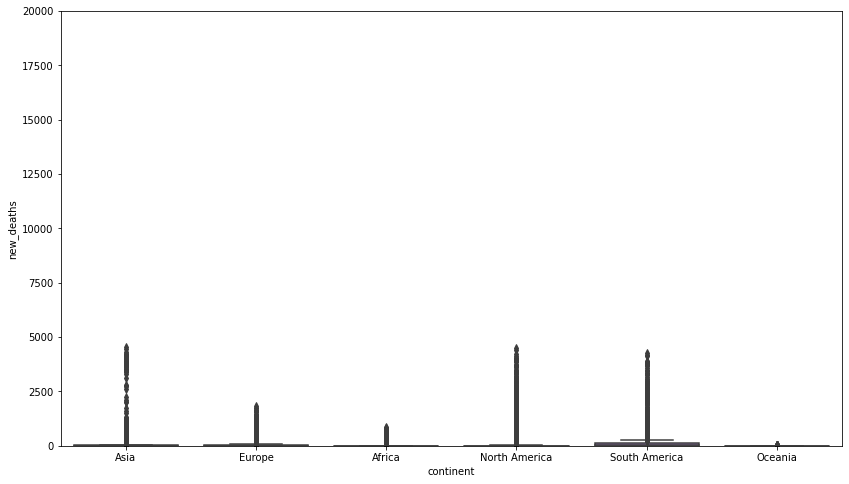

In [9]:
var = 'continent'
data = pd.concat([df['new_deaths'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

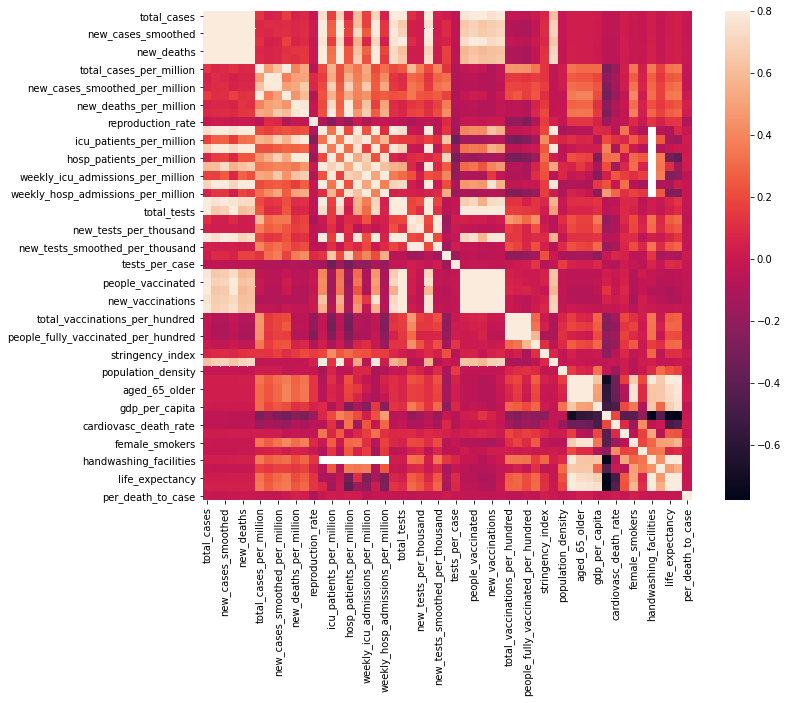

In [10]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Countries

In [11]:
country = "Malaysia"

include_mal = df[df['location'].values == country]
exclude_mal = df[df['location'].values != country]
mal_cov19 = include_mal
mal_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num,per_death_to_case
50776,MYS,Asia,Malaysia,2020-01-25,3.0,3.0,NaN,NaN,NaN,NaN,0.093,0.093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,25012020,NaN
50777,MYS,Asia,Malaysia,2020-01-26,4.0,1.0,NaN,NaN,NaN,NaN,0.124,0.031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,26012020,NaN
50778,MYS,Asia,Malaysia,2020-01-27,4.0,0.0,NaN,NaN,NaN,NaN,0.124,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,27012020,NaN
50779,MYS,Asia,Malaysia,2020-01-28,4.0,0.0,NaN,NaN,NaN,NaN,0.124,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,28012020,NaN
50780,MYS,Asia,Malaysia,2020-01-29,7.0,3.0,NaN,NaN,NaN,NaN,0.216,0.093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,29012020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51263,MYS,Asia,Malaysia,2021-05-26,533367.0,7478.0,6838.714,2432.0,63.0,56.000,16479.238,231.045,211.293,75.141,1.946,1.730,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114446.0,11513351.0,355.724,3.536,106821.0,3.3,0.064,15.6,people tested,NaN,NaN,NaN,NaN,70231.0,NaN,NaN,NaN,2170.0,NaN,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,26052021,0.008425
51264,MYS,Asia,Malaysia,2021-05-27,541224.0,7857.0,6988.857,2491.0,59.0,56.000,16721.993,242.755,215.932,76.963,1.823,1.730,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2859864.0,1809412.0,1050452.0,NaN,67954.0,8.84,5.59,3.25,2100.0,NaN,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,27052021,0.007509
51265,MYS,Asia,Malaysia,2021-05-28,549514.0,8290.0,7245.571,2552.0,61.0,57.571,16978.126,256.133,223.864,78.848,1.885,1.779,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933640.0,1855858.0,1077782.0,73776.0,69837.0,9.06,5.73,3.33,2158.0,NaN,3236

In [12]:
country = "United Kingdom"

include_uk = df[df['location'].values == country]
exclude_uk = df[df['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num,per_death_to_case
87031,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,31012020,NaN
87032,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,01022020,NaN
87033,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,02022020,NaN
87034,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,03022020,NaN
87035,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,04022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87512,GBR,Europe,United Kingdom,2021-05-26,4486168.0,2991.0,2543.143,128010.0,9.0,7.714,66083.843,44.059,37.462,1885.661,0.133,0.114,1.26,125.0,1.841,891.0,13.125,NaN,NaN,NaN,NaN,1132061.0,176394409.0,2598.391,16.676,965605.0,14.224,0.003,379.7,tests performed,62658639.0,38614683.0,24043956.0,663577.0,595544.0,92.30,56.88,35.42,8773.0,62.50,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,26052021,0.003009
87513,GBR,Europe,United Kingdom,2021-05-27,4489552.0,3384.0,2641.000,128020.0,10.0,8.143,66133.691,49.848,38.903,1885.808,0.147,0.120,1.29,120.0,1.768,870.0,12.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63349252.0,38871200.0,24478052.0,690613.0,595836.0,93.32,57.26,36.06,8777.0,62.50,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,27052021,0.002955
87514,GBR,Europe,United Kingdom,2021-05-28,4493582.0,4030.0,2829.857,128030.0,10.0,8.286,66193.055,59.36

Malaysia

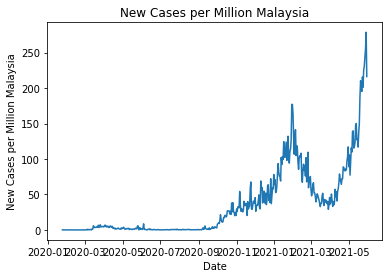

In [13]:
plt.plot(mal_cov19.date, mal_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million Malaysia')
plt.title('New Cases per Million Malaysia')
plt.show()

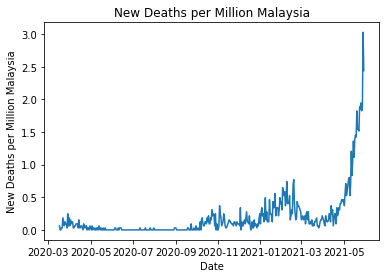

In [14]:
plt.plot(mal_cov19.date, mal_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million Malaysia')
plt.title('New Deaths per Million Malaysia')
plt.show()

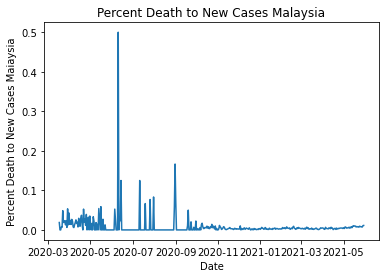

In [15]:
plt.plot(mal_cov19.date, mal_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases Maiaysia')
plt.title('Percent Death to New Cases Malaysia')
plt.show()

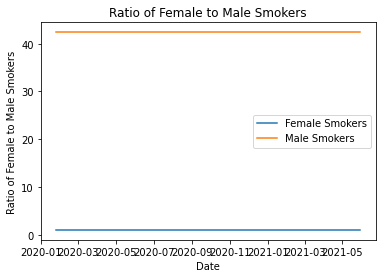

In [16]:
plt.plot(mal_cov19.date, mal_cov19.female_smokers)
plt.plot(mal_cov19.date, mal_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers')
plt.title('Ratio of Female to Male Smokers')
plt.show()

UK

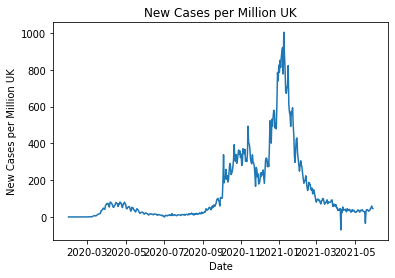

In [17]:
plt.plot(uk_cov19.date, uk_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million UK')
plt.title('New Cases per Million UK')
plt.show()

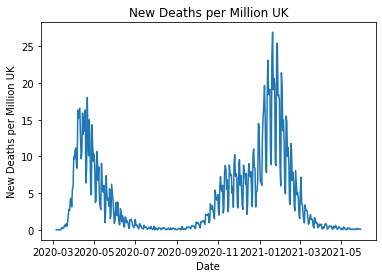

In [18]:
plt.plot(uk_cov19.date, uk_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million UK')
plt.title('New Deaths per Million UK')
plt.show()

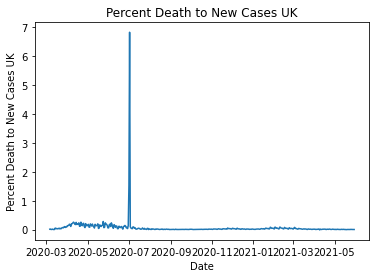

In [19]:
plt.plot(uk_cov19.date, uk_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases UK')
plt.title('Percent Death to New Cases UK')
plt.show()

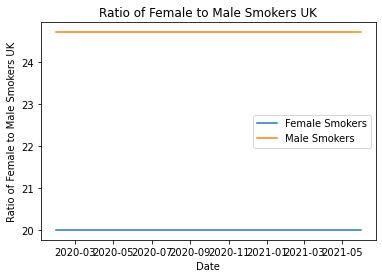

In [20]:
plt.plot(uk_cov19.date, uk_cov19.female_smokers)
plt.plot(uk_cov19.date, uk_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers UK')
plt.title('Ratio of Female to Male Smokers UK')
plt.show()

Comparisons

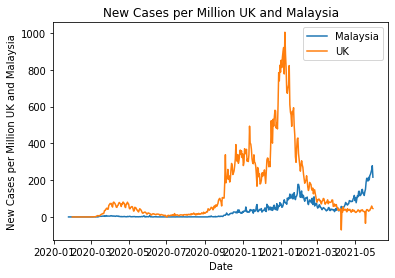

In [21]:
plt.plot(mal_cov19.date, mal_cov19.new_cases_per_million)
plt.plot(uk_cov19.date, uk_cov19.new_cases_per_million)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('New Cases per Million UK and Malaysia')
plt.title('New Cases per Million UK and Malaysia')
plt.show()

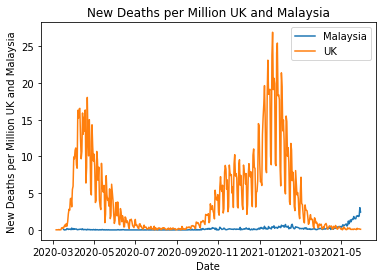

In [22]:
plt.plot(mal_cov19.date, mal_cov19.new_deaths_per_million)
plt.plot(uk_cov19.date, uk_cov19.new_deaths_per_million)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('New Deaths per Million UK and Malaysia')
plt.title('New Deaths per Million UK and Malaysia')
plt.show()

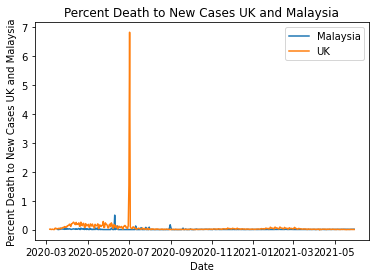

In [23]:
plt.plot(mal_cov19.date, mal_cov19.per_death_to_case)
plt.plot(uk_cov19.date, uk_cov19.per_death_to_case)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases UK and Malaysia')
plt.title('Percent Death to New Cases UK and Malaysia')
plt.show()

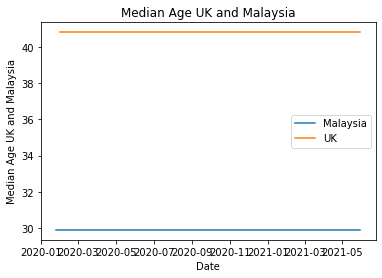

In [24]:
plt.plot(mal_cov19.date, mal_cov19.median_age)
plt.plot(uk_cov19.date, uk_cov19.median_age)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('Median Age UK and Malaysia')
plt.title('Median Age UK and Malaysia')
plt.show()

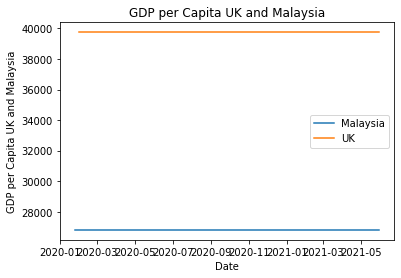

In [25]:
plt.plot(mal_cov19.date, mal_cov19.gdp_per_capita)
plt.plot(uk_cov19.date, uk_cov19.gdp_per_capita)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('GDP per Capita UK and Malaysia')
plt.title('GDP per Capita UK and Malaysia')
plt.show()

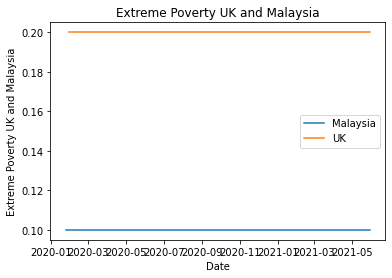

In [26]:
plt.plot(mal_cov19.date, mal_cov19.extreme_poverty)
plt.plot(uk_cov19.date, uk_cov19.extreme_poverty)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('Extreme Poverty UK and Malaysia')
plt.title('Extreme Poverty UK and Malaysia')
plt.show()

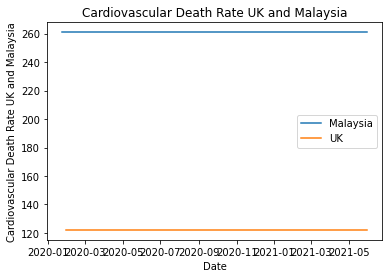

In [27]:
plt.plot(mal_cov19.date, mal_cov19.cardiovasc_death_rate)
plt.plot(uk_cov19.date, uk_cov19.cardiovasc_death_rate)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('Cardiovascular Death Rate UK and Malaysia')
plt.title('Cardiovascular Death Rate UK and Malaysia')
plt.show()

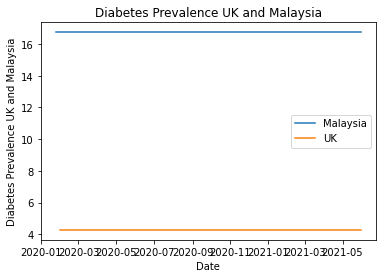

In [28]:
plt.plot(mal_cov19.date, mal_cov19.diabetes_prevalence)
plt.plot(uk_cov19.date, uk_cov19.diabetes_prevalence)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('Diabetes Prevalence UK and Malaysia')
plt.title('Diabetes Prevalence UK and Malaysia')
plt.show()

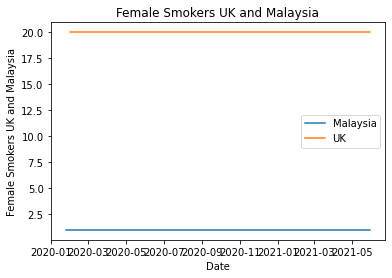

In [29]:
plt.plot(mal_cov19.date, mal_cov19.female_smokers)
plt.plot(uk_cov19.date, uk_cov19.female_smokers)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('Female Smokers UK and Malaysia')
plt.title('Female Smokers UK and Malaysia')
plt.show()

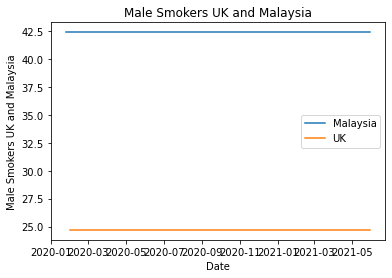

In [30]:
plt.plot(mal_cov19.date, mal_cov19.male_smokers)
plt.plot(uk_cov19.date, uk_cov19.male_smokers)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('Male Smokers UK and Malaysia')
plt.title('Male Smokers UK and Malaysia')
plt.show()

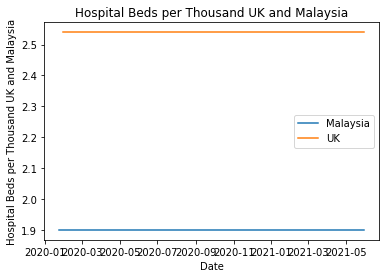

In [31]:
plt.plot(mal_cov19.date, mal_cov19.hospital_beds_per_thousand)
plt.plot(uk_cov19.date, uk_cov19.hospital_beds_per_thousand)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('Hospital Beds per Thousand UK and Malaysia')
plt.title('Hospital Beds per Thousand UK and Malaysia')
plt.show()

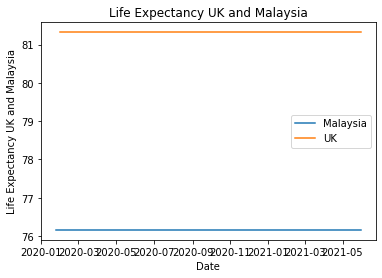

In [32]:
plt.plot(mal_cov19.date, mal_cov19.life_expectancy)
plt.plot(uk_cov19.date, uk_cov19.life_expectancy)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('Life Expectancy UK and Malaysia')
plt.title('Life Expectancy UK and Malaysia')
plt.show()

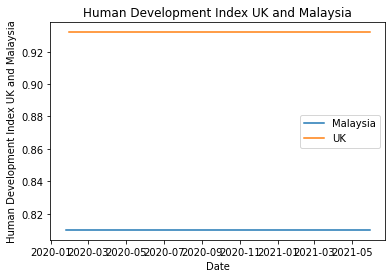

In [33]:
plt.plot(mal_cov19.date, mal_cov19.human_development_index)
plt.plot(uk_cov19.date, uk_cov19.human_development_index)
plt.legend(['Malaysia', 'UK'])
plt.xlabel('Date')
plt.ylabel('Human Development Index UK and Malaysia')
plt.title('Human Development Index UK and Malaysia')
plt.show()